# Data Balancing

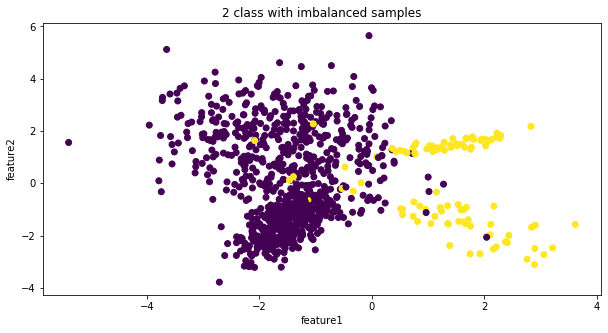

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#create an imbalanced classification dataset with 2 features

dataset = make_classification(n_samples = 1000, n_classes = 2, 
                              n_clusters_per_class = 2, n_features = 2, 
                              n_informative = 2, n_redundant = 0, 
                              n_repeated = 0, weights = [0.9,0.1], 
                              class_sep = 1.5, random_state=6)

#split features and labels

features = pd.DataFrame(dataset[0], columns = ['feature1','feature2'])
labels = pd.DataFrame(dataset[1], columns = ['label'])

#scatter plot the dataset
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))
ax.scatter(features['feature1'], features['feature2'], c = labels['label'])
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_title('2 class with imbalanced samples');
plt.show()

<BarContainer object of 2 artists>

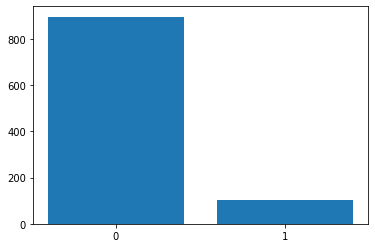

In [2]:
#histogram of labels

plt.bar([0,1],labels.label.value_counts(), tick_label = [0,1])

## Over Sampling

In [3]:
#Split train and test sets.

#This is important because manupilation of test data is forbidden :)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=False)

In [4]:
#Apply SMOTE for over sampling on train set
#See https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html 
#for parameters and other over sampling methods.

from imblearn.over_sampling import SMOTE
import numpy as np

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
y_train = y_train.astype(int)

Using TensorFlow backend.


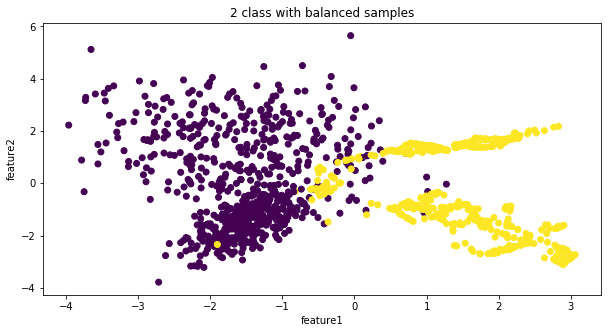

In [5]:
#scatter plot the dataset
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))
ax.scatter(X_train['feature1'], X_train['feature2'], c = y_train['label'])
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_title('2 class with balanced samples');
plt.show()

<BarContainer object of 2 artists>

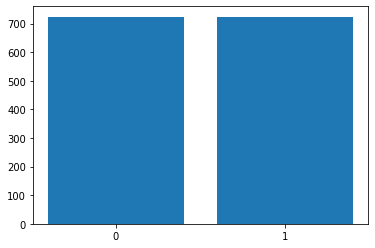

In [6]:
#histogram after SMOTE over sampling

plt.bar([0,1],y_train.label.value_counts(), tick_label = [0,1])

# Under Sampling

In [7]:
#Split train and test sets to get original sets again

#This is important because manupilation of test data is forbidden :)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=False)

In [8]:
#Apply NearMiss for under sampling
#see https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.NearMiss.html#imblearn.under_sampling.NearMiss
#for parameters and other under sampling methods.

from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_train, y_train = nm.fit_sample(X_train, y_train)
y_train = y_train.astype(int)

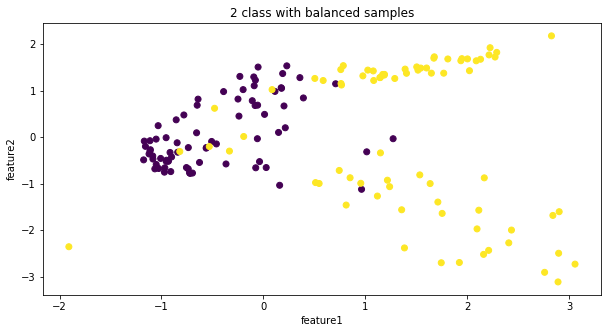

In [9]:
#scatter plot the dataset
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))
ax.scatter(X_train['feature1'], X_train['feature2'], c = y_train['label'])
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_title('2 class with balanced samples');
plt.show()

<BarContainer object of 2 artists>

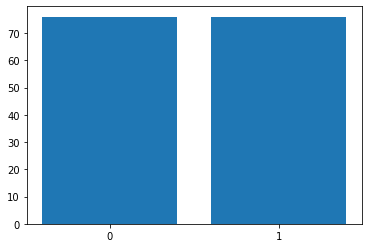

In [10]:
#histogram after NearMiss under sampling

plt.bar([0,1],y_train.label.value_counts(), tick_label = [0,1])